
---


Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. Name it *'LastName_FirstName_T1.1.ipynb'*. <ins>This is the master notebook so you will not be able to save your changes without copying it !</ins> Once you click on that, make sure you are working on that version of the notebook so that your work is saved.



---

### In this Colab notebook we explore loss - in particular, Root Mean Squared Error (RMSE) Loss for a Regression problem. We also train a basic Machine Learning model using Gradient Descent to fit our data better and consequently minimize the loss.


## 1.Exploring Loss

In this section, we define a Linear Regression problem of the form Y = wX + b. We are provided with data (xs and ys) using which we need to infer the relationship between x and y i.e., arrive at the accurate values of weight (w) and bias (b).



---


**Question 1**: It is said that in linear regression, we try to find the best fit line. Can you think of why?

**Answer:**

---



We import two libraries -


1.   [math](https://docs.python.org/3/library/math.html) - basic mathematical operations. eg: square root, power etc.
2.   [matplotlib](https://matplotlib.org/) - visualization of data in Python



In [8]:
# import libraries
import math
import matplotlib.pyplot as plt

The below cell computes the predicted Y values for your guess of w and b. Simply change their values and explore how the output and subsequently the loss changes.

---


**Question 2**: Report the loss for three different values of 'w' and 'b'. (Run the below three cells for each example)

**Answer:**


1.   w = , b = , loss =
2.   w = , b = , loss =
3.   w = , b = , loss =



---

In [9]:
# Edit these parameters w and b to try different loss
# measurements. Rerun this cell when done
# Your Y will be calculated as Y = wX + b, so
# if w = 3, and b = -1, then Y = 3x - 1

w = 2# < YOUR CODE HERE >
b = -1# < YOUR CODE HERE >

x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]     # ground truth for w = 2, b = -1, i.e, Y = 2x - 1
myY = []


for thisX in x:              # predicted Ys based on your parameters
  thisY = (w*thisX)+b
  myY.append(thisY)

print("Real Y is " + str(y))
print("My Y is   " + str(myY))

Real Y is [-3, -1, 1, 3, 5, 7]
My Y is   [-3, -1, 1, 3, 5, 7]


Before we move on to calculating the loss, lets visualize the difference between the actual Y and predicted Y values. In the below scatter plot, the *blue dots* represent the actual Y values, the *green dots* represent the predicted Y values and the *red dashed lines* represent the difference between the two for each individual data sample.

You can read more about matplotlib scatter plots [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

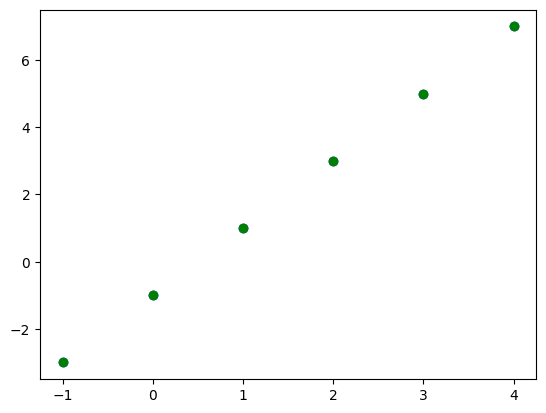

In [10]:
# visualize loss/errors
plt.scatter(x, y, color='blue')                  # ground truth
plt.scatter(x, myY, color='green')               # predicted
plt.vlines(x, ymin=min(y,myY), ymax=max(y,myY), color="red", linestyle='--', alpha=0.3)
plt.show()

---


**Question 3**: What do the 2nd and 3rd parameters of the `plt.vlines()` API signify?

**Answer:**

---

We could just take the average of the differences between the actual and predicted Ys (errors) to calculate the loss of the system. However, the presence of negative errors would cause the errors to cancel out, not giving an accurate representation of the loss. Therefore, the smart thing to do here is to square each error amount, average out all the individual squared errors, and then take the square root of that - **RMSE Loss**

**Note:** Some other measures are Mean Squared Error (MSE) Loss and Mean Absolute Error (MAE) Loss.

In [11]:
# let's calculate the loss
total_square_error = 0
size = len(y)
for i in range(0, size):
  square_error = (y[i] - myY[i]) ** 2
  total_square_error += square_error

total_square_error /= size

print("My loss is: " + str(math.sqrt(total_square_error)))

My loss is: 0.0


## 2. Minimizing Loss

In this section we attempt to iteratively minimize the loss function of our regression model by training the model on given data over multiple epochs.

We import the following libraries -


1.   [tensorflow](https://www.tensorflow.org/) - open source library to develop and train ML models
2.   [numpy](https://numpy.org/) - scientific computing in Python
3.   [matplotlib](https://matplotlib.org/) - visualization of data in Python



In [12]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

To train our Linear Regression Model, we need to first define our (i) ML Model, (ii) Loss Function, and the (iii) Training Procedure.

### Linear Regression Model

The model represents the function Y = wX + b. Therefore, the model outputs a value of Y for a given w, b, and X when it is called.

In [13]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our simple regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w*x +self.b# <YOUR CODE HERE> #

***Hint:*** Given X, the `__call__()` class method should return Y. We know Y = wX + b. Therefore, return `self.w * x + self.b`

### Loss Function

We then define our loss function which returns the Mean Squared Error (MSE) Loss.

The tensorflow API `tf.reduce_mean()` computes the mean of the input tensor. It reduces the input tensor along the specified axis. Read more [here](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean).

In [14]:
# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

### Training Procedure

Here, Gradient Descent optimization is used for the training procedure. We define a train function which performs one step of **Gradient Descent** on all data samples in our dataset (i.e., all Xs and Ys). The Gradient Descent Optimization Algorithm involves:

1.   the calculation of the loss function
2.   the derivatves of the loss function w.r.t the individual parameters (w and b here)
3.   updation of model parameters with the calculated derivatives

You can read more about the math behind Gradient Descent [here](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06es://). It is however beyond the scope of the course.

**TensorFlow API Gradient Tape** -

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [15]:
# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    # loss function
    current_loss = loss(model(inputs), outputs)

    # Here is where you differentiate loss function w.r.t model parameters
    dw, db = t.gradient(current_loss, [model.w, model.b])      # dloss/dw, dloss/db

    # And here is where you update the model parameters based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)   # model.w = model.w - learning_rate*dw
    # <YOUR CODE HERE>   # model.b = model.b - learning_rate*db
    return current_loss

---


**Question 4**: In the above example, before we train our model, what are the three things that we need to define?

**Answer:**

---

### Train Model

Now that we have defined the above individual functions, its time to put them together.

We first define our dataset, then instantiate our model. We then train our model over multiple epochs. For each epoch, we calculate and store the parameter values (w and b) and the loss.

Notice the decrease in loss as we go through more epochs.

In [16]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE = 0.14   #0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = 50
losses = []

for epoch in range(epochs):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-6.19 b=10.00, loss=197.46208
Epoch  2: w=1.04 b=10.00, loss=94.07443
Epoch  3: w=-2.19 b=10.00, loss=73.44746
Epoch  4: w=-0.75 b=10.00, loss=69.33213
Epoch  5: w=-1.39 b=10.00, loss=68.51109
Epoch  6: w=-1.10 b=10.00, loss=68.34727
Epoch  7: w=-1.23 b=10.00, loss=68.31459
Epoch  8: w=-1.18 b=10.00, loss=68.30807
Epoch  9: w=-1.20 b=10.00, loss=68.30678
Epoch 10: w=-1.19 b=10.00, loss=68.30651
Epoch 11: w=-1.20 b=10.00, loss=68.30647
Epoch 12: w=-1.19 b=10.00, loss=68.30646
Epoch 13: w=-1.19 b=10.00, loss=68.30645
Epoch 14: w=-1.19 b=10.00, loss=68.30645
Epoch 15: w=-1.19 b=10.00, loss=68.30645
Epoch 16: w=-1.19 b=10.00, loss=68.30645
Epoch 17: w=-1.19 b=10.00, loss=68.30645
Epoch 18: w=-1.19 b=10.00, loss=68.30646
Epoch 19: w=-1.19 b=10.00, loss=68.30646
Epoch 20: w=-1.19 b=10.00, loss=68.30645
Epoch 21: w=-1.19 b=10.00, loss=68.30645
Epoch 22: w=-1.19 b=10.00, loss=68.30645
Epoch 23: w=-1.19 b=10.00, loss=68.30645
Epoch 24: w=-1.

### Plot our trained values over time

Below is a plot of the model parameter values w and b (y-axis) across all the epochs (x-axis). As the model is trained, notice how the values of w and b eventually converge to the true values 2.0 and -1.0 respectively.

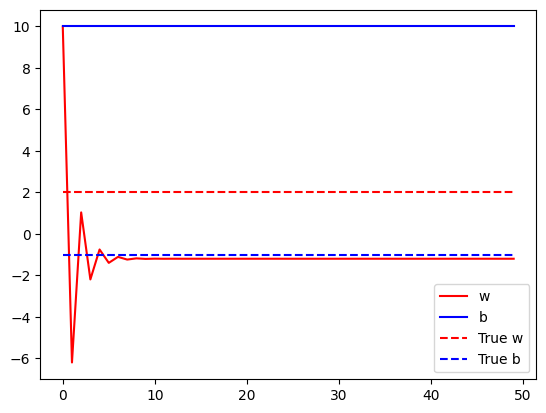

In [17]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
xaxis = range(epochs)
plt.plot(xaxis, list_w, 'r', xaxis, list_b, 'b')
plt.plot([TRUE_w] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

---


**Question 5**: In the above plot, what do the solid lines and dotted lines signify?

**Answer:**

---